# Custom preprocessing

In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
df = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_train.csv")
df

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [133]:

def get_mean(data):
    return sum(data)/len(data)

def get_variance(data):
    mean = get_mean(data)
    n = len(data)
    variance = 0
    for i in data:
        variance += (i - mean)**2
    variance = variance/(n-1)
    return variance

def get_std(data):
    return math.sqrt(get_variance(data))

def get_quantile(data, probability):
    k = int(probability * (len(data) - 1))
    alpha = probability * len(data)
    sorted_data = sorted(data)
    sorted_data.append(sorted_data[len(data) - 1])
    if k + 1 < alpha:
        return sorted_data[k + 1]
    elif k + 1 == alpha:
        return (sorted_data[k] + sorted_data[k + 1]) / 2
    else:
        return sorted_data[k]

def get_description(data, rows):
    info = {}

    for row in rows:
        info[row] = []
        q25 = get_quantile(data[row], 0.25)
        q75 = get_quantile(data[row], 0.75)
        info[row].append(q25)
        info[row].append(get_quantile(data[row], 0.5))
        info[row].append(q75)
        info[row].append(q75-q25)
        info[row].append(get_variance(df['product']))
        info[row].append(get_mean(df['product']))
    return pd.DataFrame(info, index=['0.25',
                                   '0.5',
                                   '0.75', 'interquartile range', 'variance', 'mean'])

def get_correlation(df, fields, targets):
    info = {}

    for i in fields:
        info[i] = []
        mean_i = get_mean(df[i])
        for j in targets:
            mean_j = get_mean(df[j])
            a1 = 0
            for k in range(len(df[i])):
                a1 += (df[i][k] - mean_i) * (df[j][k] - mean_j)
            b1 = 0
            for k in df[i]:
                b1 += (k - mean_i)**2
            b2 = 0
            for k in df[j]:
                b2 += (k - mean_j)**2
            info[i].append(a1/math.sqrt(b1*b2))

    return pd.DataFrame(info, index=targets)




def plot_field(df, field):
    mean_value = get_mean(df[field])
    std = get_std(df[field])
    df.hist(column=field, bins=39)
    plt.axvline(mean_value, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(mean_value - 2.5 * std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(mean_value + 2.5 * std, color='r', linestyle='dashed', linewidth=2)
    plt.show()

def plot_correlation(df, field1, field2):
    plt.xlabel(field1)
    plt.ylabel(field2)
    plt.scatter(df[field1], df[field2])
    plt.show()

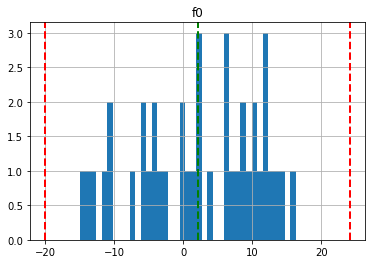

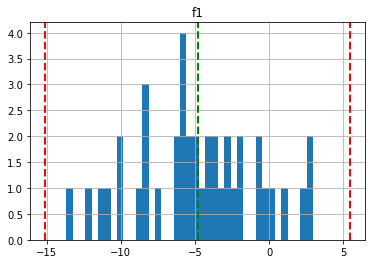

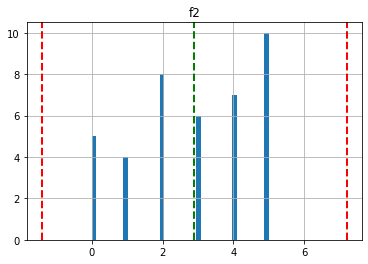

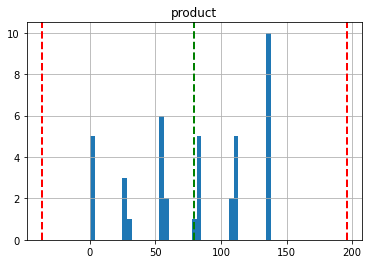

In [134]:
plot_field(df, 'f0')
plot_field(df, 'f1')
plot_field(df, 'f2')
plot_field(df, 'product')

In [135]:
get_description(df, ['f0', 'f1', 'f2', 'product'])

,f0,f1,f2,product
0.25,-4.583259,-7.858557,2.002290,53.906522
0.5,2.460140,-4.793330,2.995529,84.038886
0.75,9.800763,-2.033323,4.498138,122.879226
interquartile range,14.384022,5.825234,2.495848,68.972704
variance,2155.426415,2155.426415,2155.426415,2155.426415
mean,79.675956,79.675956,79.675956,79.675956


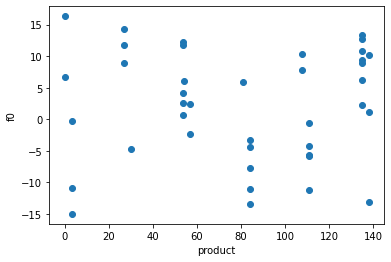

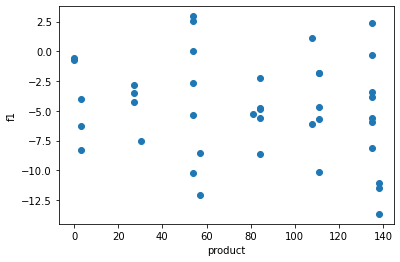

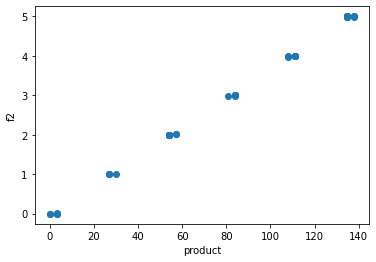

In [136]:
plot_correlation(df, 'product', 'f0')
plot_correlation(df, 'product', 'f1')
plot_correlation(df, 'product', 'f2')


In [137]:
get_correlation(df, ['f0', 'f1', 'f2'], ['product'])


,f0,f1,f2
product,0.030459,-0.167566,0.999405


# Preprocessing with Pandas

In [138]:
df.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40 non-null     object 
 1   f0       40 non-null     float64
 2   f1       40 non-null     float64
 3   f2       40 non-null     float64
 4   product  40 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


In [140]:
df.describe()

,f0,f1,f2,product
count,40.000000,40.000000,40.000000,40.000000
mean,2.077724,-4.821013,2.899393,79.675956
std,8.823711,4.101341,1.721036,46.426570
min,-15.001348,-13.659814,-0.007630,0.000000
25%,-4.478392,-7.714120,2.002661,53.906522
50%,2.460140,-4.793330,2.995529,84.038886
75%,9.596212,-2.119299,4.250260,116.935687
max,16.320755,2.944454,5.004363,137.945408


In [141]:
df.corr()

,f0,f1,f2,product
f0,1.000000,0.381836,0.058398,0.030459
f1,0.381836,1.000000,-0.150092,-0.167566
f2,0.058398,-0.150092,1.000000,0.999405
product,0.030459,-0.167566,0.999405,1.000000


In [142]:
df.isnull()

,id,f0,f1,f2,product
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Creating model

In [143]:
region1_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_train.csv")
region2_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place2_train.csv")
region3_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place3_train.csv")

region1_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_test.csv")
region2_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place2_test.csv")
region3_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place3_test.csv")

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = np.random.RandomState(100)

DATASET_SIZE = 41
CONCEIVED_SIZE = 500
REGION_BUDGET = math.floor(10_000_000_000 / CONCEIVED_SIZE * DATASET_SIZE)
DROPOUT_LIMIT = math.floor(200 / CONCEIVED_SIZE * DATASET_SIZE)
PROFIT_PER_T_BARREL = 450000
ACCEPTABLE_RISK = 0.025
TARGET = 'product'


SUFFICIENT_VOLUME = REGION_BUDGET / DROPOUT_LIMIT / PROFIT_PER_T_BARREL

def get_features(data, scaler = None):
    result = data[['f0', 'f1', 'f2']]
    if scaler is not None:
        result = scaler.transform(result)
    return result

def get_model_and_scaler(data):
    target = data[TARGET]
    features = get_features(df)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    linear_regression = LinearRegression()
    linear_regression.fit(features_train, target_train)

    predictions_valid = linear_regression.predict(features_valid)
    err = mean_squared_error(target_valid, predictions_valid, squared=False)
    print(f"RMSE модели: {err:.2f}")
    return linear_regression, scaler

def get_region_info(train_data, test_data):
    model, scaler = get_model_and_scaler(train_data)
    test_data['predictions'] = model.predict(get_features(test_data, scaler))
    best_well = test_data.sort_values(by='predictions', ascending=False)[:DROPOUT_LIMIT]
    # print("Выбранные скважины: ", best_well['id'].values)
    print(f"Средний объем добычи с одной скважины: {best_well[TARGET].mean():_}")
    profit = PROFIT_PER_T_BARREL * best_well[TARGET].sum() - REGION_BUDGET
    print(f"Прибыль региона: {profit:_}")
    bootstrap_results = []
    for i in range(100):
        sample = test_data.sample(frac=0.9, random_state=RANDOM_STATE, replace=False)
        best_of_sample = sample.sort_values(by='predictions', ascending=False)[:DROPOUT_LIMIT]
        sample_profit = PROFIT_PER_T_BARREL * best_of_sample[TARGET].sum() - REGION_BUDGET
        bootstrap_results.append(sample_profit)
    bootstrap_results = pd.Series(bootstrap_results)
    # print(bootstrap_results)
    mean = bootstrap_results.mean() #расчет средней прибыли
    print(f"Средняя прибыль, руб.: {mean:_.2f}")
    lower = bootstrap_results.quantile(.025) #строим доверительный интервал
    upper = bootstrap_results.quantile(.975)
    print(f"95% доверительный интервал: {lower:_.2f} : {upper:_.2f}")
    risk = bootstrap_results[bootstrap_results < 0].size / bootstrap_results.size * 100
    print(f"Риск убытков в данном регионе: {risk:.2f}%")
    return test_data







In [145]:
print(f"Минимальная средняя продуктивность скважины для достижения порога окупаемости: {SUFFICIENT_VOLUME}")
print("\nПервый регион")
a = get_region_info(region1_train, region1_test)
print("\nВторой регион")
b = get_region_info(region2_train, region2_test)
print("\nТретий регион")
c = get_region_info(region3_train, region3_test)


Минимальная средняя продуктивность скважины для достижения порога окупаемости: 113.88888888888889

Первый регион
RMSE модели: 0.83
Средний объем добычи с одной скважины: 117.6259535625
Прибыль региона: 26_906_865.649999976
Средняя прибыль, руб.: 40_781_822.56
95% доверительный интервал: 11_677_508.90 : 87_689_459.68
Риск убытков в данном регионе: 0.00%

Второй регион
RMSE модели: 57.49
Средний объем добычи с одной скважины: 65.69857368749999
Прибыль региона: -346_970_269.4500001
Средняя прибыль, руб.: -370_107_985.35
95% доверительный интервал: -419_744_074.15 : -334_841_302.00
Риск убытков в данном регионе: 100.00%

Третий регион
RMSE модели: 41.28
Средний объем добычи с одной скважины: 112.239704875
Прибыль региона: -11_874_124.899999976
Средняя прибыль, руб.: -26_822_023.89
95% доверительный интервал: -80_225_987.22 : 5_405_376.41
Риск убытков в данном регионе: 94.00%


In [148]:
a #перемешать обучающую и тестирующие выборки

,id,f0,f1,f2,product,predictions
0,V3Iux,0.415711,-0.107657,2.942731,175.967570,80.752375
1,lUMXX,0.107308,-0.062418,-1.686659,52.846211,-44.131802
2,dqCXo,-0.984753,0.152605,0.730856,36.592236,21.235612
3,ET3QY,-0.551515,0.770938,9.833564,160.476426,266.765739
4,K0xka,2.095151,0.348512,6.898868,26.926149,187.247853
5,5iB1B,0.603504,-0.265863,2.096468,57.089085,57.902426
6,j706S,-0.655023,0.731379,5.322069,122.778809,145.041449
7,ewfDM,0.735073,-0.392385,-1.443289,31.610146,-37.625235
8,hK6Wy,1.759622,-0.022698,3.371435,161.827815,92.133471
9,nHY0C,1.494431,-0.324409,2.474772,56.590313,67.994972


In [146]:
mean_squared_error(a[TARGET], a['predictions'], squared=False)

67.84887464150232

# Черновики

In [147]:
'''Подготовьтесь к расчёту прибыли:
1. Все ключевые значения для расчётов сохраните в отдельных переменных.
2. Рассчитайте достаточный объём сырья для безубыточной разработки новой
скважины. Сравните полученный объём сырья со средним запасом в каждом
регионе.
3. Сделайте выводы по этапу подготовки расчёта прибыли.'''
#Определим ряд констант, необходимых для исследования
COSTS = 10**7 #бюджет на разработку
INCOME = 450 #доход с одного бареля нефти
COUNT_REGION = 10 #количество исследуемых точек в одном регионе
BOREHOLES = 200 #количество выбранных скважин для разработки месторождения
loss_threshold = COSTS/(BOREHOLES*INCOME) #Минимальная средняя продуктивность скважины для достижения порога окупаемости
region_threshold = round(BOREHOLES*loss_threshold,1) #Минимальная продуктивность 200 скважин региона для достижения порога окупаемости
print('Минимальная средняя продуктивность скважины для достижения порога окупаемости:', round(loss_threshold,1), '(тыс. баррелей)')

'''
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям
модели:
1. Выберите скважины с максимальными значениями предсказаний.
2. Просуммируйте целевое значение объёма сырья, соответствующее этим
предсказаниям.
3. Рассчитайте прибыль для полученного объёма сырья.
'''
#Рассчитать прибыль для полученного объёма сырья
#функция для расчета прибыли
def profit(target, predictions, count):
    #выбираем скважины с максимальными значениями предсказаний, число скажин в переменной count
    best_pred = pd.Series(predictions).sort_values(ascending=False)[:count]
    best_target = target.reset_index(drop = True)[best_pred.index]
    profit = INCOME * best_target.sum() - COSTS
    return profit # прибыль для полученного объёма сырья.

# print("Прибыль в первой локации:", profit(target_valid_1, predictions_valid_1, BOREHOLES).round(),'рублей')
# print("Прибыль во второй локации:", profit(target_valid_2, predictions_valid_2, BOREHOLES).round(),'рублей')
# print("Прибыль в третьей локации:", profit(target_valid_3, predictions_valid_3, BOREHOLES).round(),'рублей')

'''
Посчитайте риски и прибыль для каждого региона:
1. Найти распределение прибыли. Выборки небольшие, поэтому есть смысл
использовать технологию bootstrap
2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков.
Убыток — это отрицательная прибыль.
3. Напишите выводы: предложите регион для разработки скважин и обоснуйте
выбор.
'''

state = np.random.RandomState(12345) #обеспечим случайность формируемых выборок

def region_profit(target, predictions, count = 4):
    values = []
    for i in range(1000):
        target_sample = target.reset_index(drop=True).sample(COUNT_REGION, replace=False,
                                         random_state=state) #
        probs_sample = predictions[target_sample.index]
        best_pred = pd.Series(probs_sample).sort_values(ascending=False)[:count] #выбираем месторождения с лучшими показателями
        best_target = target_sample.reset_index(drop=True)[best_pred.index]

        profit = INCOME * best_target.sum() - COSTS #расчет прибыли
        values.append(profit)

    values = pd.Series(values)
    mean = values.mean() #расчет средней прибыли
    print('Средняя прибыль, руб.: {:,.2f}'.format(mean))

    lower = values.quantile(.025) #строим доверительный интервал
    upper = values.quantile(.975)

    print('95% доверительный интервал:', '{:,.2f}'.format(lower), ':',
          '{:,.2f}'.format(upper))



Минимальная средняя продуктивность скважины для достижения порога окупаемости: 111.1 (тыс. баррелей)
